Realizamos una regresión lineal que involucra dos variables. Casi todos los problemas del mundo real con los que nos vamos a encontrar tendrán más de dos variables. La regresión lineal que involucra múltiples variables se llama "regresión lineal múltiple" o regresión lineal multivariable. Los pasos para realizar la regresión lineal múltiple son casi similares a los de la regresión lineal simple. La diferencia radica en la evaluación. Se puede utilizar para averiguar qué factor tiene el mayor impacto en el resultado previsto y cómo se relacionan las diferentes variables entre sí.

Repasaremos los elementos de la ecuación uno por uno:

1. y  : el valor que desea predecir
2. β₀ -  La intersección con el eje y de la línea significa donde la línea se cruza con el eje Y
3. β ₁: la pendiente o gradiente de la línea significa qué tan empinada es la línea
4. x  : el valor del punto de datos
5. u  - El ruido residual o causado por factores inexplicables

Tenemos un dataset de la calidad del vino tinto. El dataset corresponde a las variantes rojas del vino portugués "Vinho Verde". Debido a cuestiones de privacidad y logística, sólo se dispone de variables físico-químicas (los insumos) y sensoriales (el producto) (por ejemplo, no hay datos sobre los tipos de uva, la marca del vino, el precio de venta del vino, etc.).

Tendremos en cuenta varios atributos de entrada como acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos, alcohol. Basándonos en estos atributos haremos la predicción sobre la calidad del vino.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
dataset = pd.read_csv('winequality.csv')

Exploremos un poco los datos comprobando el número de filas y columnas en él dataset

In [3]:
dataset.shape

(1599, 12)

Dará (1599, 12) como salida lo que significa que nuestro conjunto de datos tiene 1599 filas y 12 columnas.
Para ver los detalles estadísticos del conjunto de datos, podemos usar describe():

In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Limpiemos un poco nuestros datos, así que primero comprobemos cuáles son las columnas que contienen valores NaN (Que no son un número)

In [5]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Una vez que el código anterior se ejecuta, todas las columnas deben dar False, en caso de que para cualquier columna se encuentre el resultado True, entonces se eliminan todos los valores nulos de esa columna usando el código siguiente #dataset = dataset.fillna(method='ffill')

Nuestro siguiente paso es dividir los datos en "atributos" y "etiquetas". La variable X contiene todos los atributos/características y la variable Y contiene las etiquetas.

In [6]:
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = dataset['quality'].values

Comprobemos el valor medio de la columna "calidad".

C:\Users\Moni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

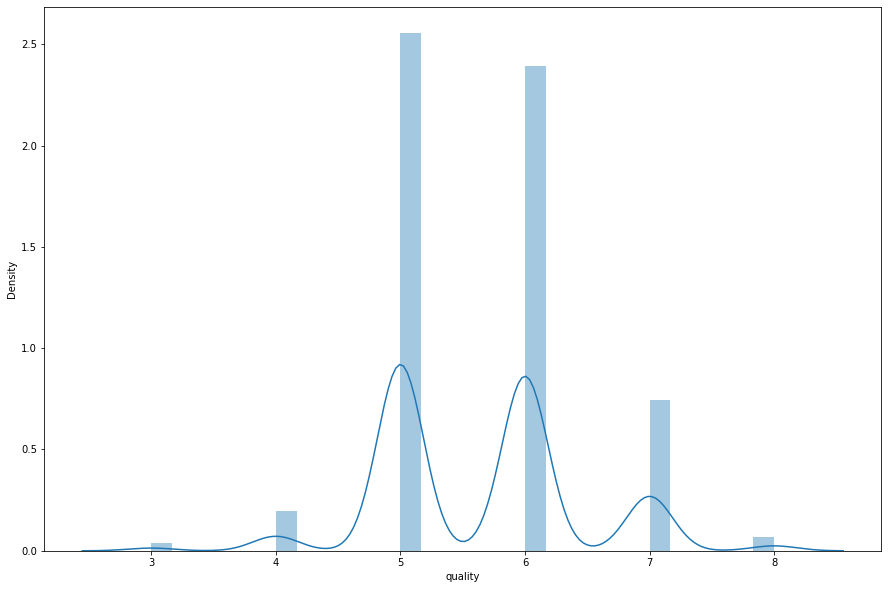

In [7]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['quality'])

Valor promedio de la calidad del vino
 
Como podemos observar, la mayoría de las veces el valor es 5 o 6. A continuación, dividimos el 80% de los datos para el conjunto de entrenamiento y  el 20% de los datos al conjunto de pruebas usando el código de abajo.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Ahora vamos a entrenar nuestro modelo

In [9]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
df = dataset.drop(['quality'], axis=1)
df = df.T
df = df.index
df

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

Como se ha dicho antes, en el caso de la regresión lineal multivariable, el modelo de regresión tiene que encontrar los coeficientes más óptimos para todos los atributos. Para ver qué coeficientes ha elegido nuestro modelo de regresión, ejecute el siguiente código:

In [11]:
coeff_df = pd.DataFrame(regressor.coef_, df, columns=['Coefficient']) 
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


“Esto significa que para un aumento de una unidad en la "densidad", hay una disminución de 31,51 unidades en la calidad del vino. Del mismo modo, la disminución en una unidad de los  "Cloruros" resulta en un aumento de 1,87 unidades en la calidad del vino. Podemos ver que el resto de los atributos tienen muy poco efecto en la calidad del vino.”

Ahora hagamos una predicción sobre los datos de la prueba.

In [12]:
y_pred = regressor.predict(X_test)

Revisemos la diferencia entre el valor real y el valor previsto.

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


Comparación entre el valor real y el valor de la predicción

Ahora vamos a graficar la comparación de los valores reales y los valores de la predicción

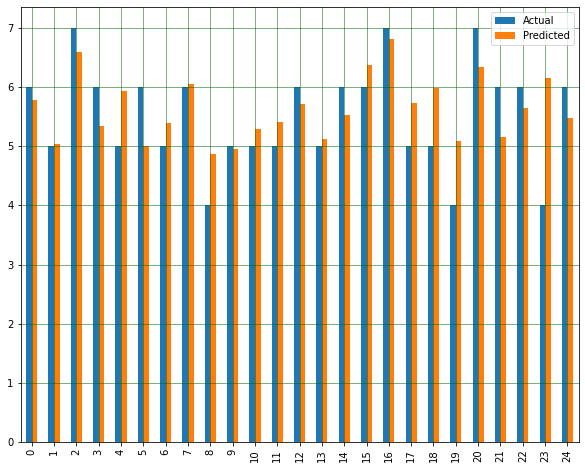

In [14]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='darkgreen')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Gráfico de barras mostrando las diferencias entre los valores reales y los de la predicción.

Como podemos observar aquí, nuestro modelo ha dado muy buenos resultados de predicción. El paso final es evaluar el rendimiento del algoritmo. Lo haremos encontrando los valores de MAE, MSE y RMSE. 

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4696330928661114
Mean Squared Error: 0.38447119782012484
Root Mean Squared Error: 0.6200574149384271


Se puede ver que el valor de la raíz del error cuadrático medio es de 0,62, que es ligeramente superior al 10% del valor de la media que es de 5,63. Esto significa que nuestro algoritmo no fue muy preciso pero aún así puede hacer predicciones razonablemente buenas.

Hay muchos factores que pueden haber contribuido a esta inexactitud, por ejemplo:

1. Necesita más datos: Necesitamos una gran cantidad de datos para obtener la mejor predicción posible.
2. Malas suposiciones: Hicimos la suposición de que estos datos tienen una relación lineal, pero puede que no sea así. Visualizar los datos puede ayudar a determinar eso.
3. Atributos pobres: Los atributos  que usamos pueden no tener una correlación lo suficientemente alta con los valores que tratamos de predecir.